In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import Agent

# Реализовать 10-рукий испытательный стенд
Испольовать жадную стратегию(eps=0.1)

Ипспользовать методы:
<li> Выборочное среднее
<li> постоянный шаг

In [34]:
# функция для случайного изменения мат. ожидания
#perc – доля объектов, которые надо изменить
def change_E(table, perc, bound):
    state_table = table.copy()
    rows_cnt = round(state_table.shape[0] * perc,)
    ind_ch = np.random.randint(0, state_table.shape[0], rows_cnt)
    for i in ind_ch:
        state_table.loc[state_table.index[i],'E'] = (state_table.loc[state_table.index[i],'E'] 
                                                +(np.random.random() - .5)*2*bound)
    return state_table

#бандюган. генерит начальные ценности для действий
class bandit:
    def __init__(self):
        self.action_table = pd.DataFrame(data={'E': np.random.uniform(-10,10,10),
                                               'D': np.random.uniform(0.02,5,10)})
    def get_action_maxE(self):
        ind_max_E = self.action_table[self.action_table['E'] == self.action_table['E'].max()].index.values
        return ind_max_E

    def get_reward(self, ind):
        if np.random.random() < 0.1:
            self.action_table = change_E(self.action_table, 0.3, 0.01)
        return np.random.randn()*self.action_table.loc[ind]['D'] + self.action_table.loc[ind]['E']

метод выборочного среднего

In [3]:
#функция типо обучения бандита
def game(N):
    banditer = bandit()
    agent = Agent.Give_me_money(alpha = None)
    sum_reward = 0
    sum_optim = 0
    reward_avg = []
    percent_optim_step = []
    for i in range(N):
        A = agent.get_action()
        reward = banditer.get_reward(A)
        agent.is_done(reward)
        
        #считаем среднее возн-ние
        sum_reward+=reward
        reward_avg.append(sum_reward/(i+1))
        
        #проверяем на оптимальность действия
        if A in banditer.get_action_maxE():
            sum_optim+=1
        percent_optim_step.append((sum_optim/(i+1))*100)
        
    return reward_avg,percent_optim_step

In [35]:
%%time
N = 10000
reward_avg_l,percent_optim_list = game(N)

CPU times: user 28.8 s, sys: 116 ms, total: 28.9 s
Wall time: 29.5 s


постоянный шаг

In [5]:
#функция типо обучения бандита
def game_const(N, alpha):
    banditer = bandit()
    agent = Agent.Give_me_money(alpha = alpha)
    sum_reward = 0
    sum_optim = 0
    reward_avg = []
    percent_optim_step = []
    for i in range(N):
        A = agent.get_action()
        reward = banditer.get_reward(A)
        agent.is_done(reward)
        
        #считаем среднее возн-ние
        sum_reward+=reward
        reward_avg.append(sum_reward/(i+1))
        
        #проверяем на оптимальность действия
        if A == banditer.get_action_maxE():
            sum_optim+=1
        percent_optim_step.append((sum_optim/(i+1))*100)
    return reward_avg, percent_optim_step

In [36]:
alpha = 0.1
N = 10000
reward_avg_const,percent_optim_list_const = game_const(N,alpha)

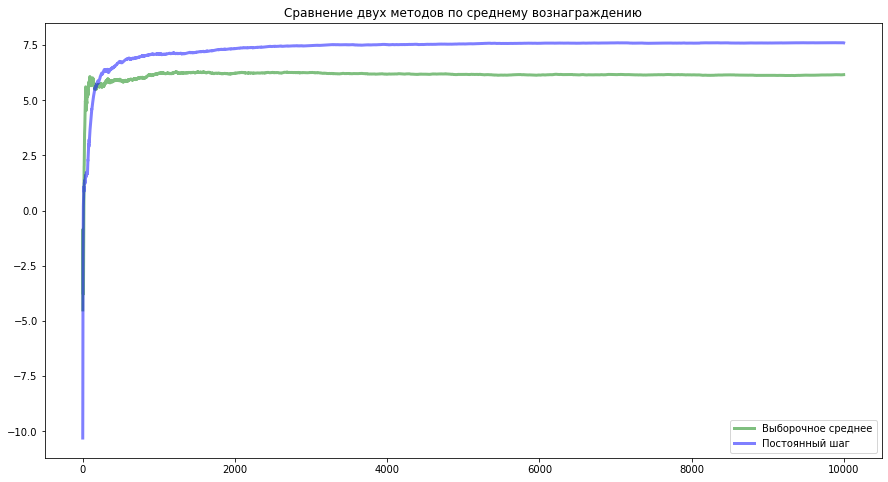

In [37]:
plt.figure(figsize=(15,8))
plt.plot(range(len(reward_avg_l)),reward_avg_l, alpha = 0.5, c='g', linewidth = 3, label = 'Выборочное среднее')
plt.plot(range(len(reward_avg_l)),reward_avg_const, alpha = 0.5, c='b',linewidth = 3, label = 'Постоянный шаг')
plt.title('Сравнение двух методов по среднему вознаграждению')
plt.legend()

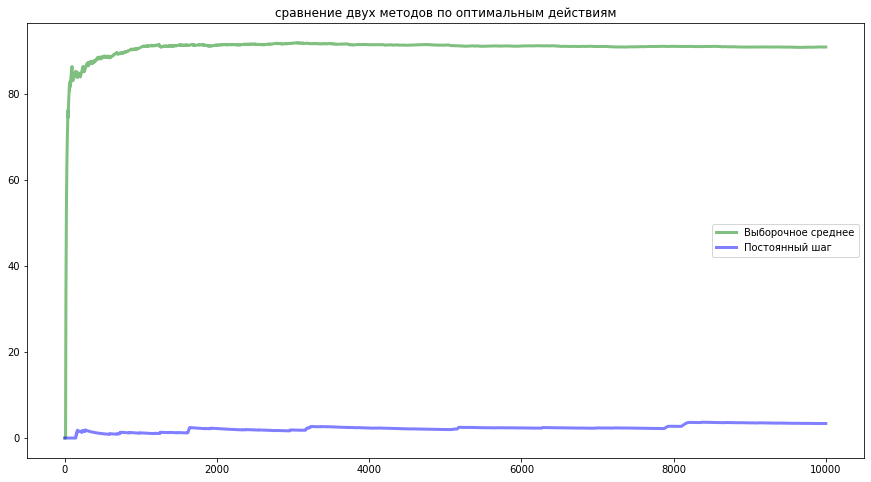

In [38]:
plt.figure(figsize=(15,8))
plt.plot(range(len(reward_avg_l)),percent_optim_list, alpha = 0.5,linewidth = 3, c='g', label = 'Выборочное среднее')
plt.plot(range(len(reward_avg_l)),percent_optim_list_const, alpha = 0.5,linewidth = 3, c='b', label = 'Постоянный шаг')
plt.title('сравнение двух методов по оптимальным действиям')
plt.legend()